## Synthetic Data Generation   
This part will use the licensed SDV package in order to learn and generate data for the diabetes CSV..

In [1]:
from sdv.datasets.local import load_csvs

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../data/diabetes.csv')

In [4]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [5]:
metadata.detect_from_dataframe(data)

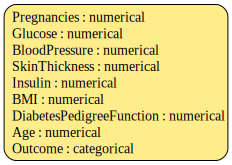

In [6]:
metadata.visualize()

In [7]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
metadata.to_dict()

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1',
 'columns': {'Pregnancies': {'sdtype': 'numerical'},
  'Glucose': {'sdtype': 'numerical'},
  'BloodPressure': {'sdtype': 'numerical'},
  'SkinThickness': {'sdtype': 'numerical'},
  'Insulin': {'sdtype': 'numerical'},
  'BMI': {'sdtype': 'numerical'},
  'DiabetesPedigreeFunction': {'sdtype': 'numerical'},
  'Age': {'sdtype': 'numerical'},
  'Outcome': {'sdtype': 'categorical'}}}

In [10]:
metadata.update_columns(
    column_names= ['BMI', 'DiabetesPedigreeFunction'],
    sdtype='numerical',
    computer_representation='Float'
)

metadata.update_columns(
    column_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age'],
    sdtype='numerical',
    computer_representation='Int64'
)

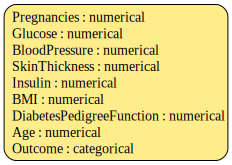

In [11]:
metadata.visualize()

In [12]:
metadata.to_dict()

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1',
 'columns': {'Pregnancies': {'sdtype': 'numerical',
   'computer_representation': 'Int64'},
  'Glucose': {'sdtype': 'numerical', 'computer_representation': 'Int64'},
  'BloodPressure': {'sdtype': 'numerical', 'computer_representation': 'Int64'},
  'SkinThickness': {'sdtype': 'numerical', 'computer_representation': 'Int64'},
  'Insulin': {'sdtype': 'numerical', 'computer_representation': 'Int64'},
  'BMI': {'sdtype': 'numerical', 'computer_representation': 'Float'},
  'DiabetesPedigreeFunction': {'sdtype': 'numerical',
   'computer_representation': 'Float'},
  'Age': {'sdtype': 'numerical', 'computer_representation': 'Int64'},
  'Outcome': {'sdtype': 'categorical'}}}

In [13]:
from sdv.single_table import CTGANSynthesizer

In [16]:
synth_CTGAN = CTGANSynthesizer(
    metadata,
    enforce_rounding=True,
    epochs=1000,
    verbose=True
)

In [17]:
synth_CTGAN.fit()

AttributeError: 'NoneType' object has no attribute 'split'

In [20]:
from sdv.single_table import GaussianCopulaSynthesizer

synth_GC = GaussianCopulaSynthesizer(
    metadata
)

In [21]:
synth_GC.fit(data)

In [24]:
synt_data = synth_GC.sample(num_rows=768)

In [25]:
synt_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,96,68,15,45,30.3,0.429,36,1
1,11,93,75,44,222,31.3,0.425,34,0
2,1,110,50,29,296,36.1,0.128,38,0
3,0,159,74,23,169,44.4,0.448,26,0
4,0,149,76,31,293,26.9,0.831,34,0
...,...,...,...,...,...,...,...,...,...
763,0,163,84,26,221,33.9,0.756,40,0
764,11,106,70,26,58,29.0,0.094,29,0
765,10,77,63,24,98,33.3,0.502,44,1
766,5,94,74,23,93,33.9,0.310,34,0


In [26]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=data,
    synthetic_data=synt_data,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 1044.31it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 281.86it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [27]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=data,
    synthetic_data=synt_data,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 935.72it/s]|
Column Shapes Score: 85.56%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:00<00:00, 148.07it/s]|
Column Pair Trends Score: 91.39%

Overall Score (Average): 88.47%



In [30]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=data,
    synthetic_data=synt_data,
    metadata=metadata,
    column_names=['Age', 'BMI'],
    )
    
fig.show(renderer='vscode')

In [35]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=data,
    synthetic_data=synt_data,
    metadata=metadata,
    column_name='BloodPressure'
)
    
fig.show(renderer='vscode')

In [41]:
quality_report.get_details(property_name='Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,Pregnancies,Glucose,CorrelationSimilarity,0.930652,0.129459,-0.009237
1,Pregnancies,BloodPressure,CorrelationSimilarity,0.994956,0.141282,0.151370
2,Pregnancies,SkinThickness,CorrelationSimilarity,0.991449,-0.081672,-0.064570
3,Pregnancies,Insulin,CorrelationSimilarity,0.987437,-0.073535,-0.048408
4,Pregnancies,BMI,CorrelationSimilarity,0.962657,0.017683,-0.057003
5,Pregnancies,DiabetesPedigreeFunction,CorrelationSimilarity,0.989460,-0.033523,-0.054604
6,Pregnancies,Age,CorrelationSimilarity,0.894529,0.544341,0.333399
7,Pregnancies,Outcome,ContingencySimilarity,0.731771,NaN,NaN
8,Glucose,BloodPressure,CorrelationSimilarity,0.969028,0.152590,0.214534
9,Glucose,SkinThickness,CorrelationSimilarity,0.979826,0.057328,0.016980


In [40]:
quality_report.get_visualization('Column Pair Trends').show(renderer='vscode')

In [42]:
synt_data.to_csv('../data/diabetes_synth.csv')